In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("coffee_survey.csv")
df.head(20)

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V0LPeM,55-64 years old,NaN,NaN,"Pod/capsule machine (e.g. Keurig/Nespresso), E...",NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,V0Gaxg,18-24 years old,NaN,"At a cafe, At the office, At home, On the go","Pour over, French press, Espresso, Instant cof...",NaN,"National chain (e.g. Starbucks, Dunkin), Local...",NaN,Pourover,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AdzRL0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LbWda2,25-34 years old,Less than 1,At a cafe,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EXQLWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
col_name = "where_drink"
labels = ['At home', 'At the office', 'At a cafe', 'On the go', 'None of these']
# response_counts = df[col_name].value_counts()
# # brew_location = response_counts[response_counts.index.isin(labels)]
# # brew_location
# response_counts
df['where_drink'] = df['where_drink'].str.strip().str.lower()
labels = [label.lower() for label in labels]
# Filter the dataframe to include only rows where the column matches the labels
filtered_df = df[df[col_name].isin(labels)]

# Get the counts for the filtered data
response_counts = filtered_df[col_name].value_counts()

# Ensure the counts are in the same order as the labels list
response_counts = response_counts.reindex(labels, fill_value=0)

# Print the filtered counts
print(response_counts)

where_drink
at home          1695
at the office     141
at a cafe          71
on the go          32
none of these      34
Name: count, dtype: int64


[85.90978205778002, 7.146477445514445, 3.598580841358338, 1.6218955904713634, 1.7232640648758235]


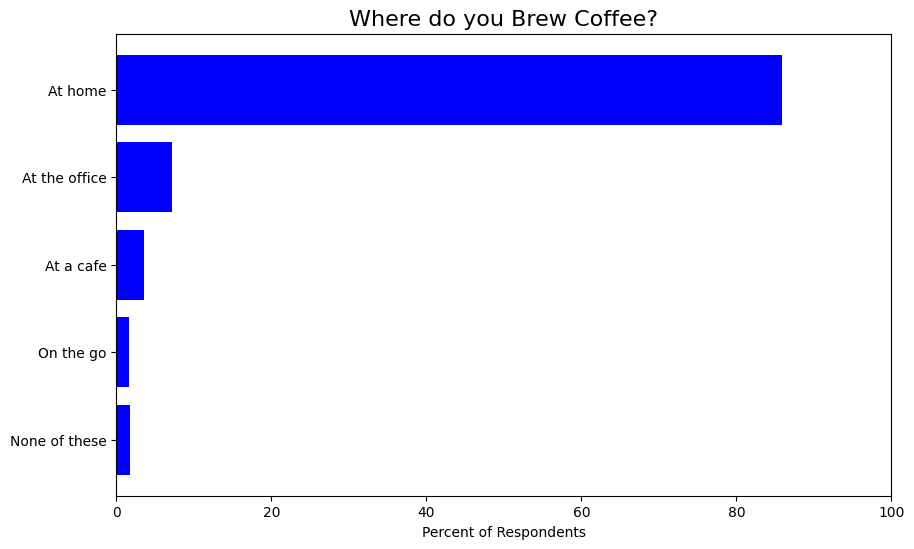

In [21]:
# import matplotlib.pyplot as plt

# Data for the plot
labels = ['At home', 'At the office', 'At a cafe', 'On the go', 'None of these']
# percentages = [92, 36, 29, 18, 1]  # Replace with your actual values
# Example counts
# counts = [920, 360, 290, 180, 10]

# Calculate total responses
total = sum(response_counts)

# Calculate percentages
percentages = [(count / total) * 100 for count in response_counts]

# Print percentages
print(percentages)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, percentages, color='blue')

# Add percentage labels to each bar
# for bar, percentage in zip(bars, percentages):
#     plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, f'{percentage}%', 
#              va='center', ha='right', color='white', fontsize=14)

# Set title and labels
plt.title('Where do you Brew Coffee?', fontsize=16)
plt.xlabel('Percent of Respondents')
plt.xlim(0, 100)
plt.gca().invert_yaxis()  # Invert y-axis to match the order

# # Set background color and remove grid
# plt.gca().set_facecolor('lightgrey')
# plt.grid(False)
# plt.tight_layout()

# Show the plot
plt.show()
